In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *

In [3]:
tools=["optitype",'T1K','hlahd','hisat',"arcas",'rna2hla',"seq2hla","hlaforest","phlat","hlavbseq",'hlaminer']
my_order=["Optitype","T1K","HLA-HD","HISAT","arcasHLA","RNA2HLA","seq2HLA","HLAforest","PHLAT","HLA-vbseq",'HLAminer']

In [4]:
def get_boxplot(t):
    
    pre=pd.read_csv("../results/standard/"+str(t)+"_d1.csv")
    
    missed_alleles = []
    total_alleles = []

    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")

        ret = get_miscalled_and_all_alleles(pre,gs)
        missed_alleles.extend(ret[0])
        total_alleles.extend(ret[1])
        
    missed_counts = Counter(missed_alleles)
    total_counts = Counter(total_alleles)
    
    df = []
    for k in total_counts.keys():
        try:
            df.append([k,total_counts[k],missed_counts[k], (missed_counts[k]/total_counts[k])])
        except:
            df.append([k,total_counts[k],0,0])

    df = pd.DataFrame(df,columns=['allele','all_count','missed_count','missed_rate'])
    df = df.sort_values(by=['missed_rate'],ascending=False)
    df = df.drop(index=[3]) # drop error
    df = df[df.missed_rate != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot

    loci = [get_locus(allele) for allele in df["allele"]]
    accuracy = [1-r for r in df["missed_rate"]]
    df.insert(1, "Locus", loci, True)
    df.insert(4,'accuracy', accuracy, True)
    
    return df



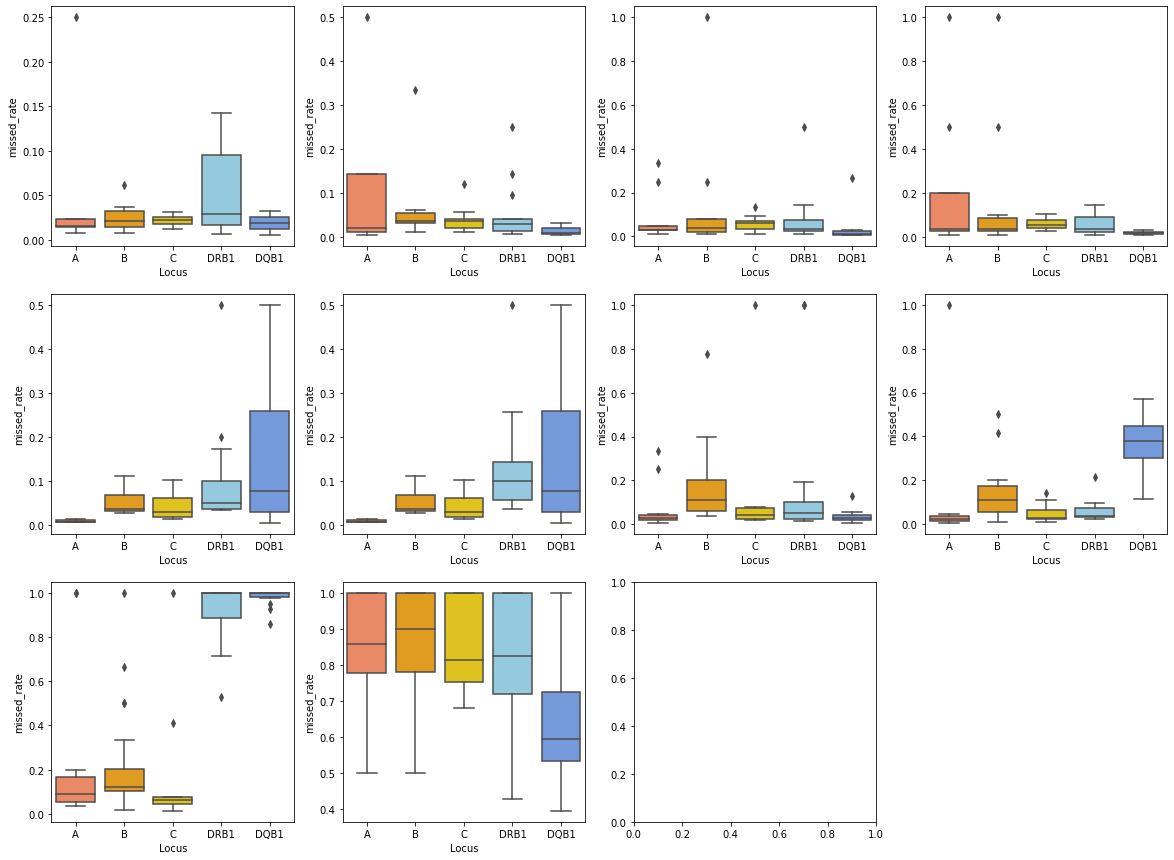

In [8]:
i=1
plt.figure(figsize=(20,15))

for tool in tools:
    df = get_boxplot(tool)
    
    sns.boxplot(data=df, x='Locus', y='missed_rate', order=['A','B','C','DRB1','DQB1'],palette=['coral','orange','gold','skyblue','cornflowerblue'])

    plt.subplot(3, 4, i)
    i+=1